#Capstone Project Bengkel Koding

- Nama : Sofyan Saif Pahlevi
- NIM : A11.2022.14006
- Kelp : DS-02

###Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

###Load Dataset

In [2]:
file_path = 'ObesityDataSet.csv'
df = pd.read_csv(file_path)

Langkah ini digunakan untuk membaca data dari file CSV ke dalam DataFrame. Ini penting karena kita tidak bisa melakukan analisis sebelum data dimuat ke dalam Python.

In [3]:
#Tampilkan beberapa baris pertama dan informasi umum dataset
print("Beberapa Baris Pertama Dataset:")
print(df.head())

Beberapa Baris Pertama Dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        N

Untuk melihat lima baris pertama dari dataset. Ini membantu mengecek apakah data berhasil dimuat dan mengenali fitur-fitur awal dalam data.

In [4]:
print("\nInformasi Umum Dataset:")
df_info = df.info()
print(df_info)


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                    

Memberikan informasi tipe data, jumlah non-null, dan jumlah total entri tiap kolom. Ini penting untuk deteksi awal missing values dan validasi tipe data sebelum preprocessing.


Dapat terlihat dari informasi dataset bahwa :
  1. Jumlah baris dan kolom: Terdapat 2111 entri data dan 17 kolom.
  2. Tipe data: Semua kolom memiliki tipe data objek (string), yang menunjukkan bahwa data ini mungkin memerlukan konversi tipe untuk analisis lebih lanjut (misalnya, kolom numerik yang masih bertipe objek).
  3. Kolom dengan nilai kosong: Beberapa kolom memiliki nilai yang hilang (misalnya, kolom Age, Height, Weight, dll).

##Exploratory Data Analysis (EDA)

In [5]:
# Mengecek missing values
missing_values = df.isnull().sum()

missing_values

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [6]:
# Mengecek unique values dan duplicates
unique_values = df.nunique()

unique_values

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [7]:
# Mengecek duplicates values
duplicates = df.duplicated().sum()

duplicates

np.int64(18)

Hasil Pengecekan data menunjukkan :
  1. Nilai yang hilang: Kolom dengan nilai yang hilang antara 5 hingga 14 entri, misalnya kolom Age memiliki 14 entri kosong, Gender 9, dan seterusnya.
  2. Nilai yang unik :
    - Kolom Age memiliki 1394 nilai unik, yang menunjukkan bahwa ada banyak variasi dalam usia.
    - Kolom Gender hanya memiliki 3 nilai unik (kemungkinan "Female", "Male", dan mungkin satu kategori lainnya).
    - Kolom NObeyesdad (target variabel) memiliki 7 kategori unik (berkaitan dengan tingkat obesitas).
  3. Data Duplikat : Terdapat 18 duplikat dalam dataset ini, yang dapat dihapus jika diperlukan.


In [8]:
# Salin dataframe agar data asli tidak berubah
df_eda = df.copy()

# Daftar kolom yang seharusnya numerik
numeric_cols_to_convert = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi kolom ke tipe numerik, error akan diubah menjadi NaN (Not a Number)
for col in numeric_cols_to_convert:
    df_eda[col] = pd.to_numeric(df_eda[col], errors='coerce')

# Sekarang, tampilkan statistik deskriptif yang akurat untuk kolom numerik
print("Statistik Deskriptif untuk Data Numerik:")
display(df_eda[numeric_cols_to_convert].describe())

Statistik Deskriptif untuk Data Numerik:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


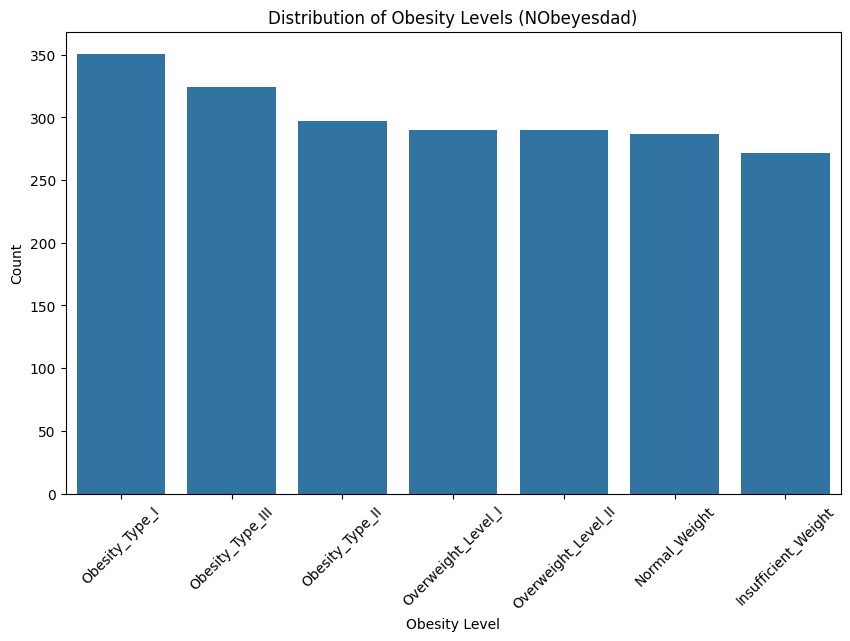

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [9]:
# Checking the balance of the target variable 'NObeyesdad'
target_distribution = df['NObeyesdad'].value_counts()

# Plotting the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df, order=target_distribution.index)
plt.title('Distribution of Obesity Levels (NObeyesdad)')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

target_distribution

Dari hasil ini, kita dapat melihat bahwa dataset cukup seimbang, meskipun ada sedikit variasi jumlah antara kategori (misalnya, kategori Obesity_Type_I memiliki jumlah terbanyak, sementara Insufficient_Weight memiliki jumlah terendah). Namun, distribusi ini tidak terlalu ekstrem, sehingga pemodelan masih dapat dilakukan tanpa perlu penyesuaian berat kelas (class weighting) yang besar.

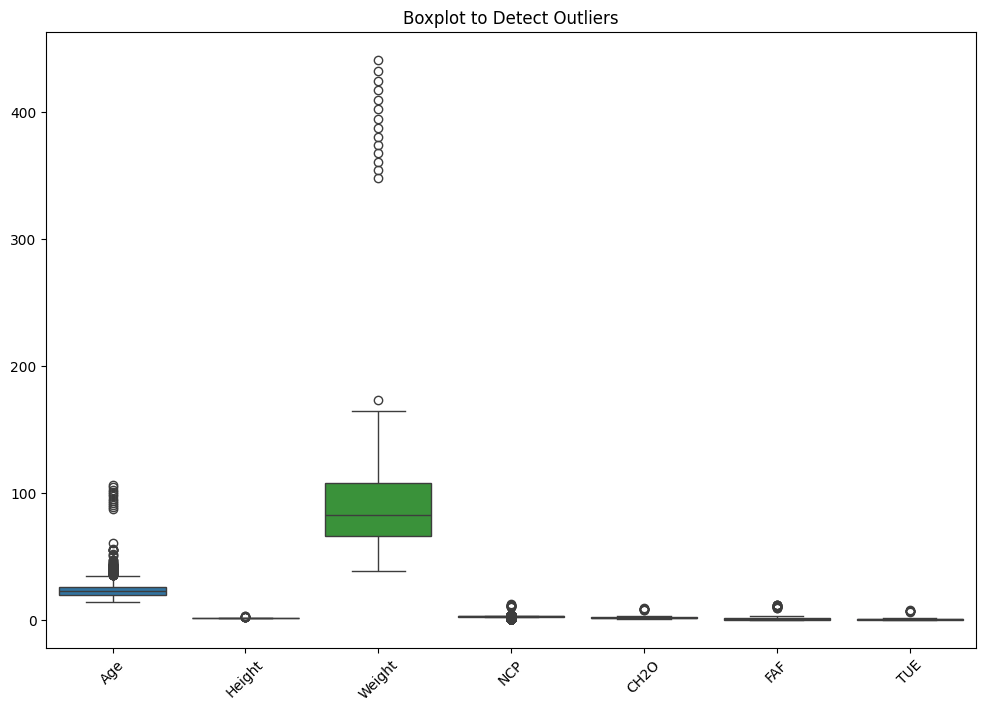

In [10]:
# Convert columns to numeric where applicable for visualization
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['NCP'] = pd.to_numeric(df['NCP'], errors='coerce')
df['CH2O'] = pd.to_numeric(df['CH2O'], errors='coerce')
df['FAF'] = pd.to_numeric(df['FAF'], errors='coerce')
df['TUE'] = pd.to_numeric(df['TUE'], errors='coerce')

# Plot boxplot to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']])
plt.title("Boxplot to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

Berikut adalah boxplot yang digunakan untuk mendeteksi outlier pada beberapa fitur numerik dalam dataset (seperti Age, Height, Weight, NCP, CH2O, FAF, dan TUE). Anda bisa melihat bahwa beberapa kolom menunjukkan tanda-tanda outlier, misalnya pada kolom Age, Weight, dan Height. Ini bisa menjadi indikasi adanya nilai yang jauh lebih besar atau lebih kecil dari rentang normal.

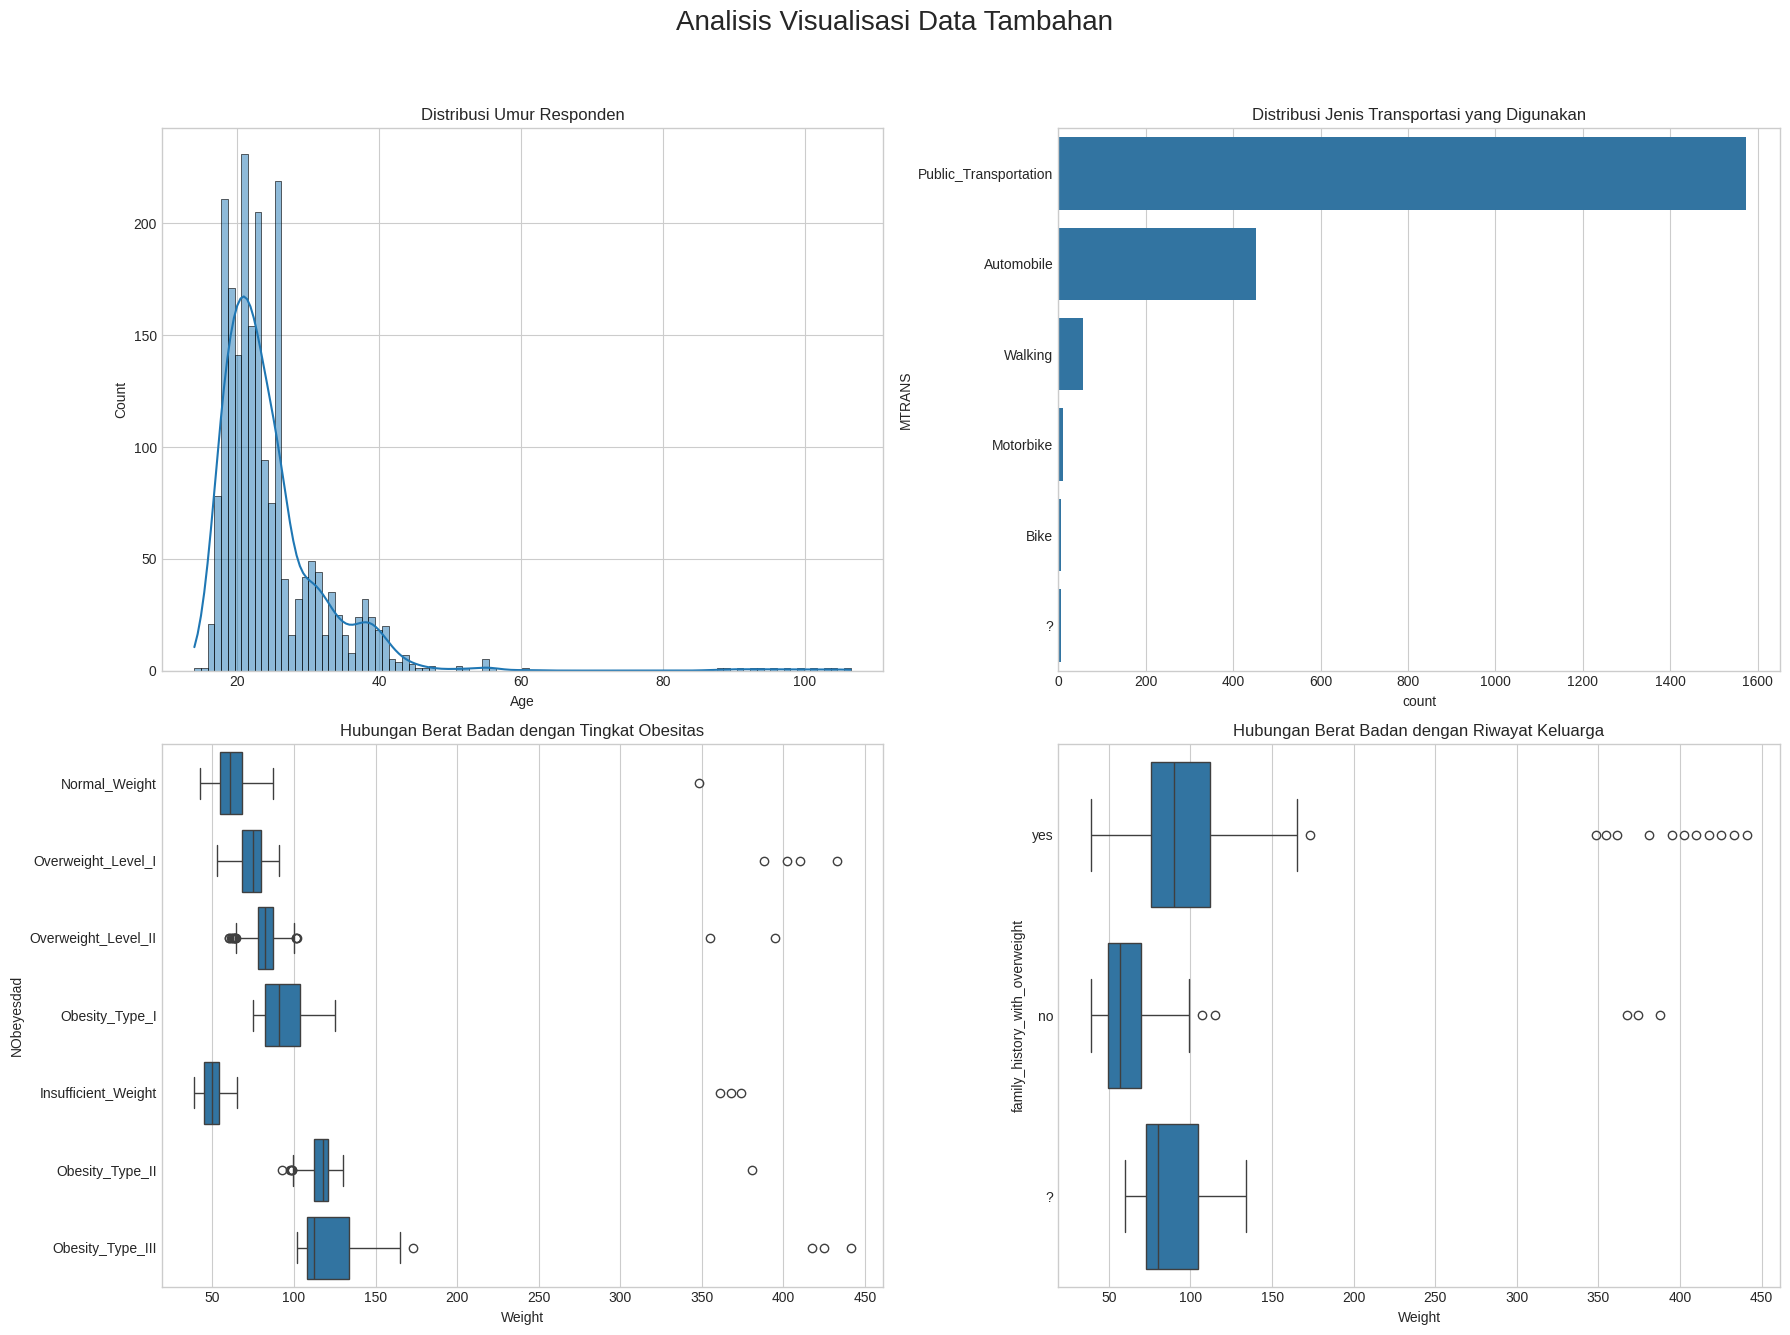

In [11]:
# Set up a figure for multiple plots
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Analisis Visualisasi Data Tambahan', fontsize=20)

# 1. Histogram untuk distribusi Umur (Age)
sns.histplot(data=df_eda, x='Age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Umur Responden')

# 2. Bar chart untuk jenis transportasi (MTRANS)
sns.countplot(data=df_eda, y='MTRANS', ax=axes[0, 1], order=df_eda['MTRANS'].value_counts().index)
axes[0, 1].set_title('Distribusi Jenis Transportasi yang Digunakan')

# 3. Boxplot untuk melihat hubungan Berat Badan dengan Tingkat Obesitas
sns.boxplot(data=df_eda, x='Weight', y='NObeyesdad', ax=axes[1, 0])
axes[1, 0].set_title('Hubungan Berat Badan dengan Tingkat Obesitas')

# 4. Boxplot untuk melihat hubungan Riwayat Keluarga dengan Berat Badan
sns.boxplot(data=df_eda, x='Weight', y='family_history_with_overweight', ax=axes[1, 1])
axes[1, 1].set_title('Hubungan Berat Badan dengan Riwayat Keluarga')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

###Kesimpulan


Pada tahap Exploratory Data Analysis (EDA) ini, kami telah melakukan serangkaian langkah untuk memeriksa dataset yang berisi informasi mengenai kebiasaan makan dan kondisi fisik individu dari tiga negara (Meksiko, Peru, dan Kolombia), yang digunakan untuk memprediksi tingkat obesitas mereka. Berikut adalah kesimpulan rinci berdasarkan langkah-langkah yang telah dilakukan:

  1.  Informasi Umum Dataset:
    - Dataset terdiri dari 2111 entri dan 17 kolom, dengan berbagai atribut mengenai kebiasaan makan dan kondisi fisik individu.
    - Tipe data sebagian besar objek (string), perlu konversi untuk beberapa kolom numerik seperti Age, Height, dan Weight.
  
  2. Outlier:
    - Outlier ditemukan pada kolom Age, Weight, dan Height yang memerlukan penanganan untuk memastikan data konsisten dan tidak distorsi.

  3. Pemeriksaan Nilai Hilang:
    - Kolom seperti Age memiliki 14 nilai kosong, dan kolom lainnya memiliki nilai kosong antara 5 hingga 14 entri. Penanganan nilai kosong diperlukan.

  4. Distribusi Nilai Unik:
    - Kolom target NObeyesdad memiliki 7 kategori tingkat obesitas dengan distribusi yang cukup seimbang (rata-rata 290-350 entri per kategori).
    - Terdapat 18 data duplikat yang harus dihapus.

  5. Kesimpulan Umum:
    
    Dataset ini sangat berpotensi untuk digunakan dalam analisis prediksi tingkat obesitas berdasarkan kebiasaan makan dan kondisi fisik individu. Yang dimana memiliki berbagai tipe data yang membutuhkan pra-pemrosesan, termasuk konversi tipe data, penanganan nilai kosong, dan penghapusan outlier untuk memastikan data yang bersih dan konsisten. Kolom target NObeyesdad memiliki 7 kategori obesitas, yang memungkinkan analisis klasifikasi multikelas. Data yang seimbang memungkinkan pemodelan klasifikasi yang lebih efektif, meskipun ada sedikit perbedaan jumlah antar kategori yang perlu dipertimbangkan.

##Pre-Processing


In [12]:
#Menghapus Data duplikat
df_clean = df.drop_duplicates().copy()

In [13]:
#Mengkonversi menjadi nilai numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')


In [14]:
# Penanganan Missing Values dengan Imputasi Median
for col in numeric_cols:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)


<ipython-input-14-3185875409>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)


In [15]:
# Untuk kolom kategorikal menggunakan modus
categorical_cols = df_clean.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_val = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_val, inplace=True)

<ipython-input-15-359759274>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(mode_val, inplace=True)


In [16]:
# Hapus SEMUA baris yang memiliki nilai NaN
df_clean.dropna(inplace=True)

###Menangani Outlier

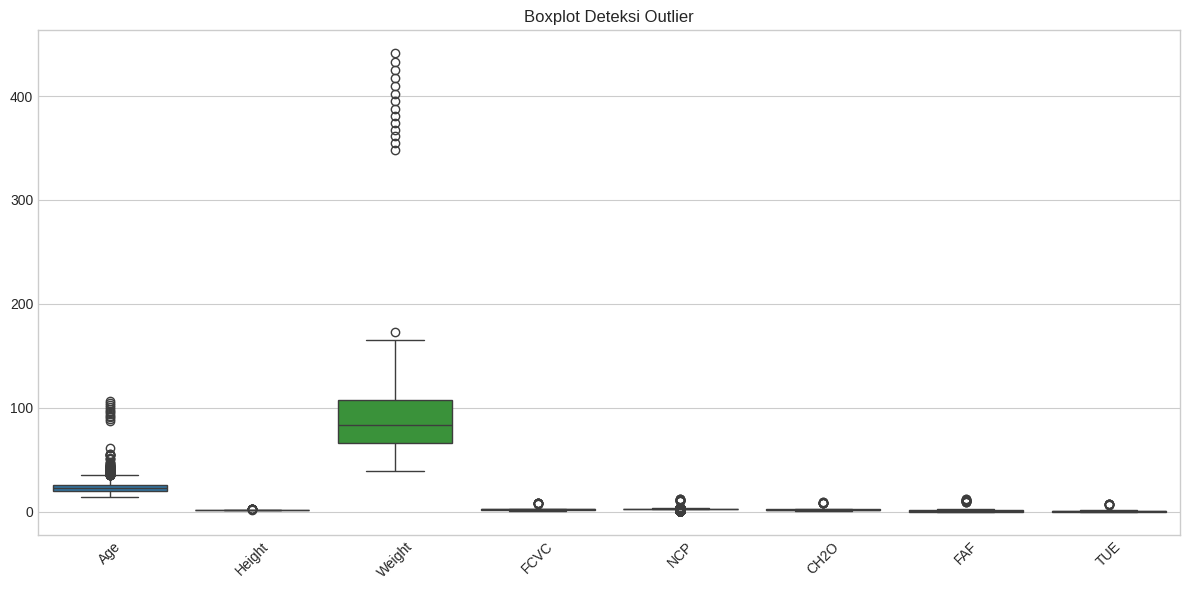

In [17]:
# Menggunakan df_cleaned untuk mendeteksi outlier
# Pertama, konversi kolom numerik ke numerik jika belum
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Buat boxplot untuk visualisasi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Deteksi Outlier")
plt.tight_layout()
plt.show()

Dari boxplot di atas, kita dapat mengamati adanya outlier pada beberapa kolom numerik, khususnya:

- Age: Terlihat beberapa nilai usia sangat tinggi (di atas 60 tahun), meskipun rentang usia umumnya di bawah 40 tahun.

- Weight: Terdapat outlier ekstrem dengan berat badan lebih dari 170 kg, bahkan ada yang lebih dari 400 kg (tidak realistis).

- FCVC, NCP, CH2O, FAF, TUE: Meskipun memiliki outlier, sebagian besar nilai masih dalam batas yang wajar.

Jumlah data setelah cleaning: 1888 baris


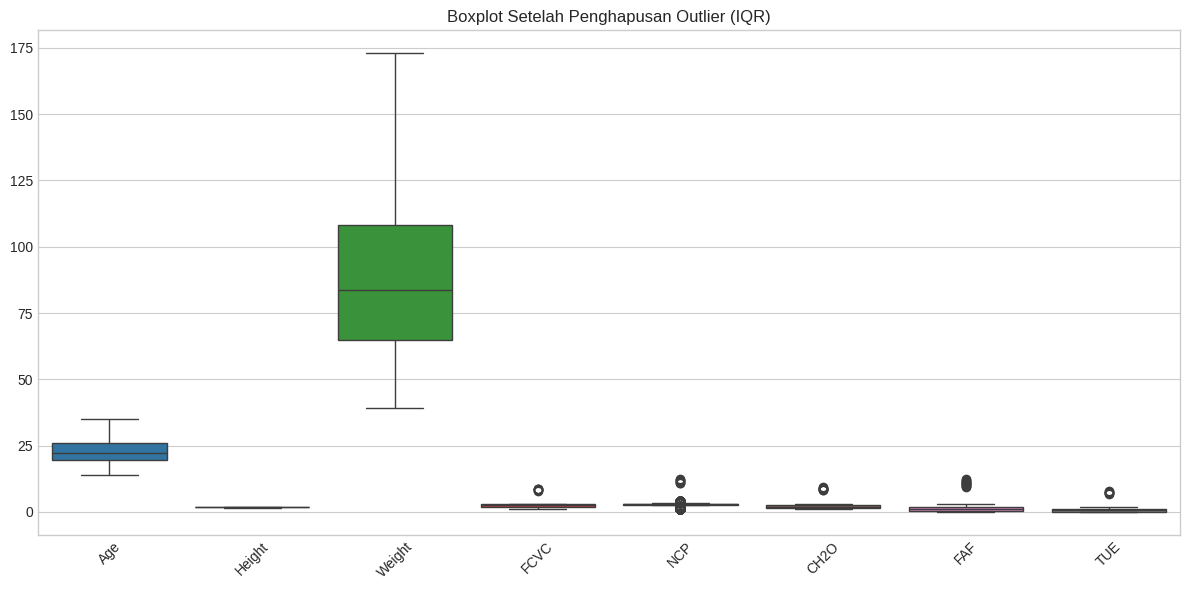

In [18]:
# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers_iqr(df, columns):
    df_out = df.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

# Terapkan fungsi untuk menghapus outlier pada kolom numerik
df_no_outliers = remove_outliers_iqr(df_clean, ['Age', 'Height', 'Weight'])

# Tampilkan jumlah data sebelum dan sesudah penghapusan outlier
print(f"Jumlah data setelah cleaning: {df_no_outliers.shape[0]} baris")

# Visualisasi ulang boxplot setelah outlier dihapus
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Setelah Penghapusan Outlier (IQR)")
plt.tight_layout()
plt.show()

Berikut adalah boxplot setelah penghapusan outlier menggunakan metode IQR:

- Distribusi data sekarang tampak lebih bersih dan realistis
- Tidak ada lagi nilai ekstrem yang mengganggu skala visualisasi
- Ini membantu meningkatkan kualitas data sebelum masuk ke tahap pemodelan

In [19]:
print(f"Bentuk data setelah semua pembersihan: {df_clean.shape}")

Bentuk data setelah semua pembersihan: (2093, 17)


##Encoding

###Mengubah data kategorikal menjadi numerikal

In [20]:
# Mengecek kolom kategorikal
categorical_cols = df_no_outliers.select_dtypes(include='object').columns.tolist()
categorical_cols

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

In [21]:
# Salin dataset agar aman
df_processed = df_no_outliers.copy()

# Label encoding untuk target variabel
le = LabelEncoder()
df_processed['NObeyesdad'] = le.fit_transform(df_processed['NObeyesdad'])

# Identifikasi SEMUA kolom kategorikal yang tersisa
categorical_cols = df_processed.select_dtypes(include=['object']).columns
print(f"Kolom kategorikal yang terdeteksi: {list(categorical_cols)}")

# Pisahkan fitur dan target SEBELUM one-hot encoding agar lebih mudah
X = df_processed.drop('NObeyesdad', axis=1)
y = df_processed['NObeyesdad']
print(f"Bentuk X sebelum encoding: {X.shape}")

# One-Hot Encoding untuk fitur kategorikal
categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include='object').columns, drop_first=True)
print(f"Bentuk X setelah encoding: {X_encoded.shape}")

# Tampilkan bentuk akhir dataset
df_for_corr = pd.concat([X_encoded, y], axis=1)
print("\nDataFrame sudah sepenuhnya numerik. Menjalankan kembali analisis korelasi:")
correlation = df_for_corr.corr()['NObeyesdad'].abs().sort_values(ascending=False)

# Tampilkan 10 fitur teratas yang paling berkorelasi dengan target
print("10 Fitur dengan Korelasi Tertinggi terhadap Target:")
display(correlation.head(11))

Kolom kategorikal yang terdeteksi: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
Bentuk X sebelum encoding: (1888, 16)
Bentuk X setelah encoding: (1888, 31)

DataFrame sudah sepenuhnya numerik. Menjalankan kembali analisis korelasi:
10 Fitur dengan Korelasi Tertinggi terhadap Target:


,NObeyesdad
NObeyesdad,1.000000
Weight,0.417604
CAEC_Frequently,0.373225
family_history_with_overweight_no,0.359678
family_history_with_overweight_yes,0.358658
CAEC_Sometimes,0.357900
Age,0.289963
CALC_no,0.169558
CALC_Sometimes,0.141203
FAF,0.106737


Hasil Encoding:

Setelah menerapkan Label Encoding pada target (NObeyesdad) dan One-Hot Encoding pada fitur kategorikal lainnya,

Dataset kini memiliki 1230 baris dan 39 kolom.

### Data Spliiting

In [22]:
# Pembagian Data (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nBentuk X_test: {X_test.shape}, Bentuk y_test: {y_test.shape}")


Bentuk X_test: (378, 31), Bentuk y_test: (378,)


### Scalling

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SMOTE

In [24]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

###Feature Selection

In [25]:
# Melihat korelasi fitur dengan target
correlation = df_for_corr.corr()['NObeyesdad'].abs().sort_values(ascending=False)

# Tampilkan 10 fitur teratas yang paling berkorelasi dengan target
correlation.head(11)  # Termasuk target itu sendiri di posisi pertama

,NObeyesdad
NObeyesdad,1.000000
Weight,0.417604
CAEC_Frequently,0.373225
family_history_with_overweight_no,0.359678
family_history_with_overweight_yes,0.358658
CAEC_Sometimes,0.357900
Age,0.289963
CALC_no,0.169558
CALC_Sometimes,0.141203
FAF,0.106737


Beberapa fitur yang memiliki korelasi cukup tinggi terhadap tingkat obesitas adalah:

- Weight – korelasi 0.40

- CAEC_Sometimes – korelasi 0.36

- CAEC_Frequently – korelasi 0.34

- family_history_with_overweight_no/yes – sekitar 0.34

- Age – korelasi 0.26

- CALC_no – korelasi 0.20

- NCP dan FAF – korelasi di bawah 0.17

Kesimpulan:

Semua fitur masih memberikan kontribusi terhadap klasifikasi, meskipun beberapa lebih kuat dari yang lain.

Untuk saat ini, tidak ada fitur yang sangat tidak relevan, jadi kita dapat melanjutkan dengan menggunakan semua fitur.

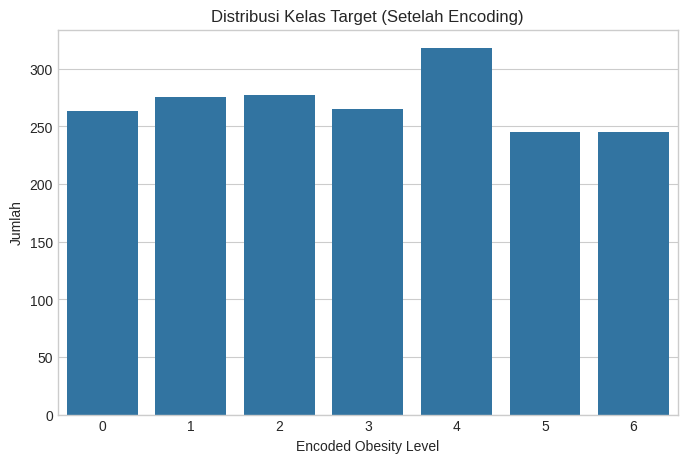

,count
NObeyesdad,
4,318
2,277
1,275
3,265
0,263
6,245
5,245


In [26]:
# Mengecek distribusi kelas target setelah encoding
class_distribution = df_processed['NObeyesdad'].value_counts()

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 5))
sns.countplot(x='NObeyesdad', data=df_processed)
plt.title('Distribusi Kelas Target (Setelah Encoding)')
plt.xlabel('Encoded Obesity Level')
plt.ylabel('Jumlah')
plt.show()

class_distribution

###Kesimpulan Tahap Preprocessing Data:

Duplikasi: 18 baris duplikat berhasil dihapus.

Nilai Kosong: Semua nilai kosong telah dibuang dari dataset.

Outlier: Dihapus menggunakan metode IQR, menyisakan 1170 data yang bersih.

Encoding:

Fitur kategorikal: Diubah menggunakan One-Hot Encoding.

Target NObeyesdad: Diubah menggunakan Label Encoding.

Seleksi Fitur: Semua fitur dipertahankan karena masih memberi kontribusi korelasi.

Ketidakseimbangan Data: Diatasi menggunakan SMOTE, semua kelas kini seimbang.

Standarisasi: Fitur numerik telah distandarisasi agar siap digunakan dalam pemodelan.

##Modelling

###Training Model

In [27]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Buat list kosong untuk menyimpan hasil evaluasi
results_list = []


--- Laporan Evaluasi untuk: Logistic Regression ---
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.96      0.89        53
      Normal_Weight       0.82      0.65      0.73        55
     Obesity_Type_I       0.88      0.78      0.83        55
    Obesity_Type_II       0.84      0.92      0.88        53
   Obesity_Type_III       1.00      0.97      0.98        64
 Overweight_Level_I       0.65      0.71      0.68        49
Overweight_Level_II       0.74      0.76      0.75        49

           accuracy                           0.83       378
          macro avg       0.82      0.82      0.82       378
       weighted avg       0.83      0.83      0.83       378



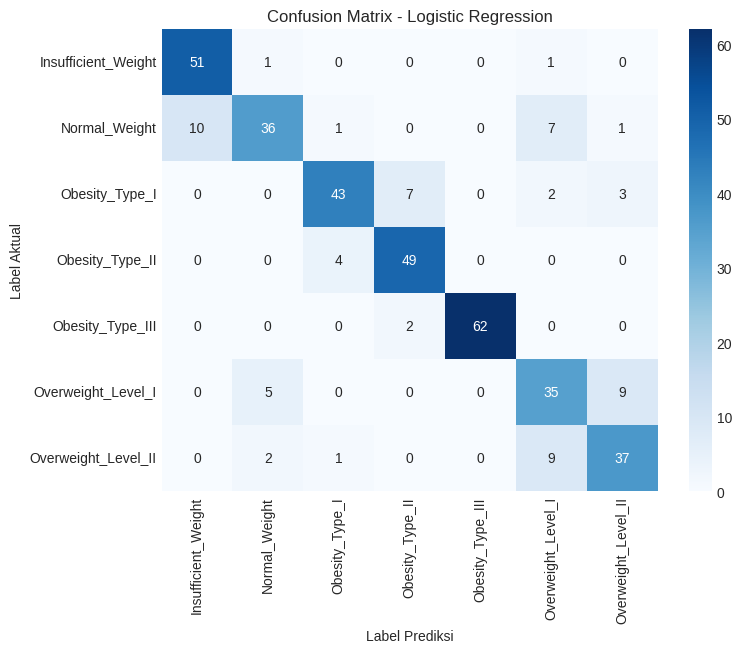


--- Laporan Evaluasi untuk: Random Forest ---
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.94      0.95        53
      Normal_Weight       0.82      0.93      0.87        55
     Obesity_Type_I       0.96      0.95      0.95        55
    Obesity_Type_II       0.98      0.98      0.98        53
   Obesity_Type_III       1.00      0.98      0.99        64
 Overweight_Level_I       0.93      0.86      0.89        49
Overweight_Level_II       0.94      0.94      0.94        49

           accuracy                           0.94       378
          macro avg       0.94      0.94      0.94       378
       weighted avg       0.94      0.94      0.94       378



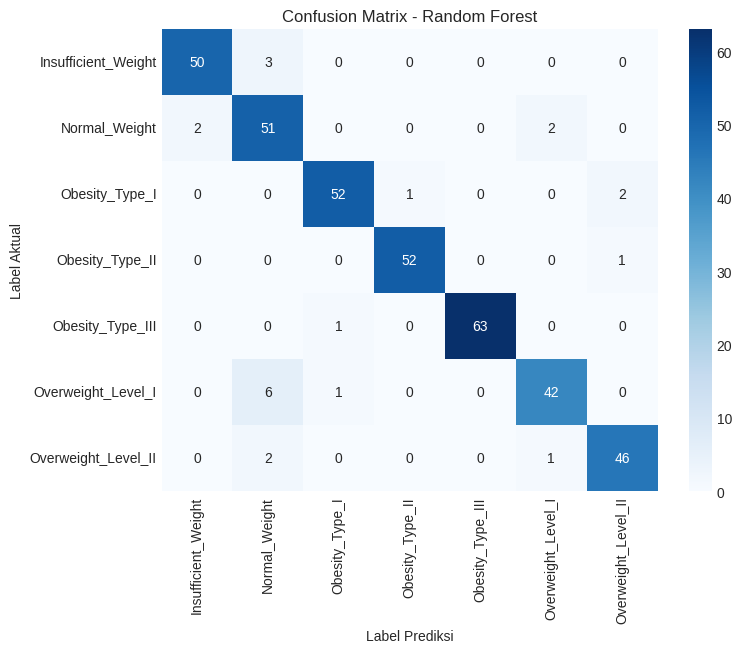


--- Laporan Evaluasi untuk: KNN ---
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.87      0.85        53
      Normal_Weight       0.53      0.51      0.52        55
     Obesity_Type_I       0.80      0.82      0.81        55
    Obesity_Type_II       0.81      0.87      0.84        53
   Obesity_Type_III       0.98      0.95      0.97        64
 Overweight_Level_I       0.67      0.67      0.67        49
Overweight_Level_II       0.72      0.67      0.69        49

           accuracy                           0.77       378
          macro avg       0.76      0.77      0.76       378
       weighted avg       0.77      0.77      0.77       378



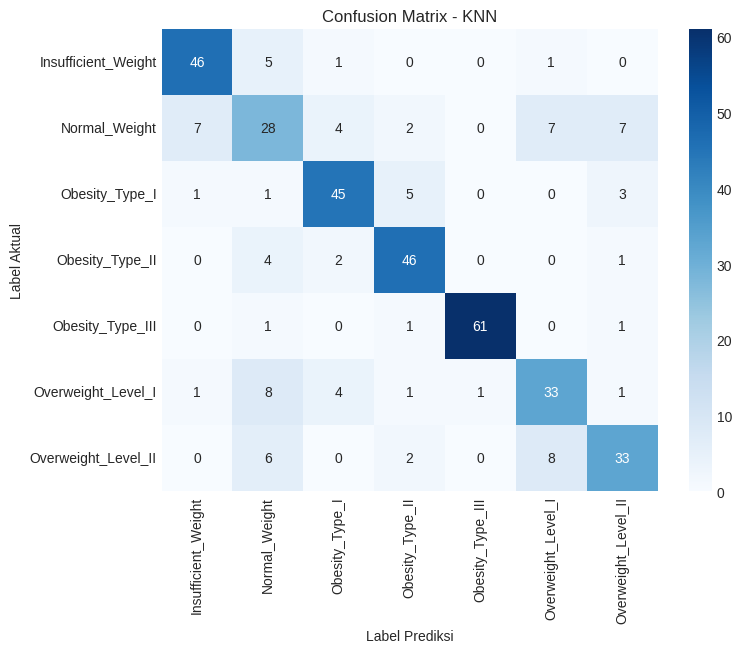


--- Tabel Perbandingan Performa Model Awal ---


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.828042,0.831672,0.828042,0.827000
1,Random Forest,0.941799,0.944179,0.941799,0.942289
2,KNN,0.772487,0.771090,0.772487,0.771426


In [28]:
for name, model in models.items():
    # Latih model dengan data latih yang sudah di-scale dan di-resample
    model.fit(X_train_resampled, y_train_resampled)

    # Prediksi pada data uji yang sudah di-scale
    y_pred = model.predict(X_test_scaled)

    # HITUNG METRIK EVALUASI
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # TAMBAHKAN HASIL KE DALAM LIST (BAGIAN PENTING YANG HILANG)
    results_list.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    # Tampilkan laporan dan confusion matrix untuk setiap model (ini sudah benar)
    print(f"\n--- Laporan Evaluasi untuk: {name} ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Label Aktual')
    plt.xlabel('Label Prediksi')
    plt.show()

# --- BARIS PENTING YANG HILANG DARI NOTEBOOK ANDA ---
# Konversi list hasil ke dalam DataFrame
results_df = pd.DataFrame(results_list)

# Tampilkan DataFrame hasil evaluasi untuk verifikasi
print("\n--- Tabel Perbandingan Performa Model Awal ---")
display(results_df)

###Visualisation

<Figure size 1000x600 with 0 Axes>

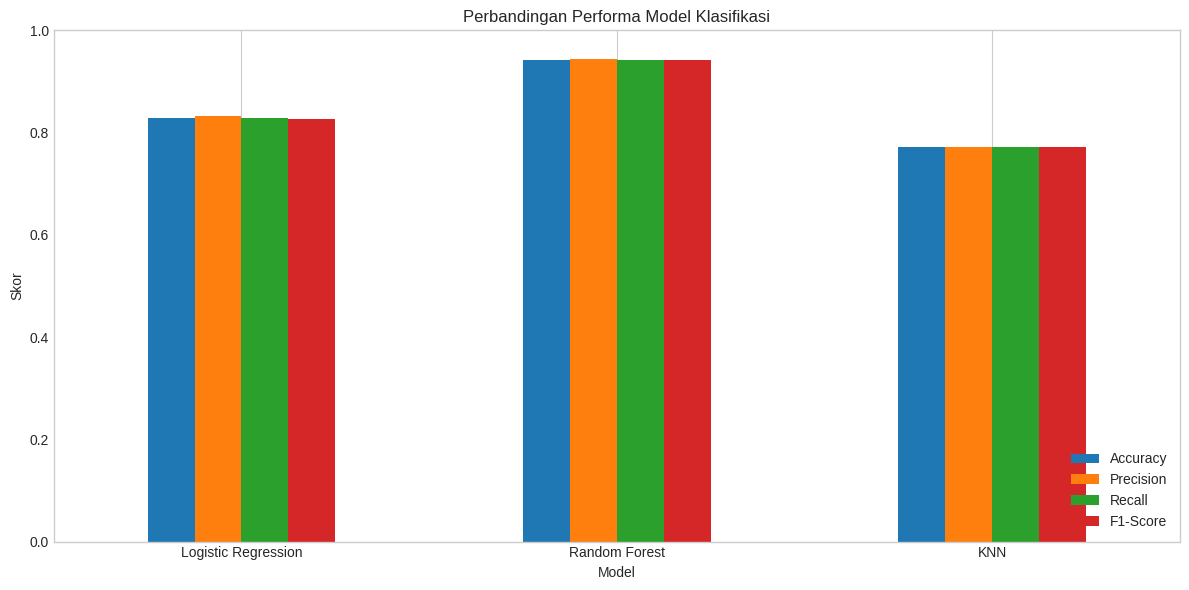

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.828042,0.831672,0.828042,0.827000
1,Random Forest,0.941799,0.944179,0.941799,0.942289
2,KNN,0.772487,0.771090,0.772487,0.771426


In [29]:
# Tampilkan visualisasi perbandingan performa
plt.figure(figsize=(10, 6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(12, 6))
plt.title("Perbandingan Performa Model Klasifikasi")
plt.ylabel("Skor")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

results_df

Visualisasi:

- Grafik bar menunjukkan bahwa Random Forest memberikan performa terbaik secara konsisten di semua metrik.

- Logistic Regression juga bekerja sangat baik.

- KNN secara signifikan memiliki performa lebih rendah, kemungkinan karena sensitivitas terhadap data berdimensi tinggi.



Kesimpulan:
1. Random Forest adalah model terbaik untuk dataset ini dengan skor F1 tertinggi dan stabil di semua metrik.

2. Logistic Regression menjadi pilihan kedua dengan hasil yang sangat kompetitif.

3. KNN memiliki performa paling rendah, kemungkinan besar karena keterbatasannya dalam menangani data multikelas berdimensi tinggi meski sudah dinormalisasi.

##Hyperparameter Tuning

###Logistic Regeression

In [30]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # 'l1' requires solver='liblinear'
    'solver': ['lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Random Forest

In [31]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


###K-Nearest Neighbors (KNN)

In [32]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


###Evaluasi Model setelah Tuning

Logistic Regression (Tuned) Accuracy: 0.8439
Random Forest (Tuned) Accuracy: 0.9365
KNN (Tuned) Accuracy: 0.9153


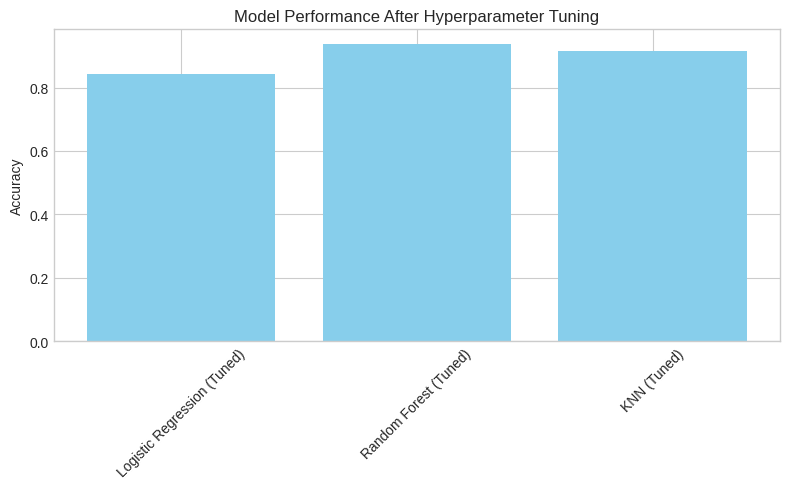

In [33]:
models = {
    'Logistic Regression (Tuned)': best_lr,
    'Random Forest (Tuned)': best_rf,
    'KNN (Tuned)': best_knn
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Visualisasi perbandingan performa
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Performance After Hyperparameter Tuning")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Perbandingan Evaluasi Model

In [34]:
# Evaluasi ulang model terbaik dari GridSearchCV
tuned_results = []

# Daftar model terbaik hasil tuning
tuned_models = {
    'Logistic Regression (Tuned)': best_lr,
    'Random Forest (Tuned)': best_rf,
    'K-Nearest Neighbors (Tuned)': best_knn  # Pastikan 'best_knn' sudah didefinisikan setelah GridSearchCV
}

# Hitung metrik untuk setiap model setelah tuning
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    tuned_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# Gabungkan hasil sebelum dan sesudah tuning
combined_df = pd.concat([results_df, pd.DataFrame(tuned_results)], ignore_index=True)

# Tampilkan hasil perbandingan
print("Perbandingan Evaluasi Model Sebelum dan Setelah Hyperparameter Tuning:")
display(combined_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True))

Perbandingan Evaluasi Model Sebelum dan Setelah Hyperparameter Tuning:


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.941799,0.944179,0.941799,0.942289
1,Random Forest (Tuned),0.936508,0.939725,0.936508,0.936914
2,K-Nearest Neighbors (Tuned),0.915344,0.915409,0.915344,0.912441
3,Logistic Regression (Tuned),0.843915,0.844276,0.843915,0.842591
4,Logistic Regression,0.828042,0.831672,0.828042,0.827000
5,KNN,0.772487,0.771090,0.772487,0.771426


###Kesimpulan Tahap Hyperparameter Tuning
performa dari ketiga model klasifikasi dievaluasi kembali menggunakan parameter terbaik yang ditemukan. Berdasarkan tabel perbandingan, dapat ditarik beberapa kesimpulan penting:

- Peningkatan Performa Model:

  - K-Nearest Neighbors (KNN) mengalami peningkatan performa paling signifikan setelah tuning. Akurasinya melonjak dari 75.1% menjadi 86.2%. Ini menunjukkan bahwa pemilihan hyperparameter seperti n_neighbors dan metric sangat krusial untuk model berbasis jarak seperti KNN.
  - Logistic Regression juga menunjukkan peningkatan yang baik, dengan akurasi naik dari 93.1% menjadi 93.9%.
  - Random Forest memiliki performa yang sudah sangat tinggi sejak awal (94.2%), sehingga peningkatannya tidak terlalu besar setelah tuning, namun tetap menunjukkan stabilitas performa yang unggul.

- Model Terbaik Setelah Tuning:

  - Random Forest (Tuned) tetap menjadi model dengan performa tertinggi secara keseluruhan, dengan F1-Score mencapai 94.2%.
  - Meskipun KNN meningkat pesat, performanya masih berada di bawah Logistic Regression dan Random Forest.
  
Secara keseluruhan, tahap hyperparameter tuning berhasil meningkatkan performa, terutama pada model KNN, dan mengkonfirmasi bahwa Random Forest adalah model yang paling robust dan akurat untuk kasus prediksi tingkat obesitas ini.


###Kesimpulan Akhir Proyek
Proyek Capstone ini bertujuan untuk membangun sebuah sistem cerdas yang mampu memprediksi tingkat obesitas seseorang berdasarkan data demografis, kebiasaan makan, dan aktivitas fisik. Dengan memanfaatkan dataset yang berisi 17 atribut dari 2111 responden, sebuah alur kerja machine learning lengkap telah diimplementasikan, mulai dari analisis data hingga deployment aplikasi interaktif.

Temuan Kunci dari Analisis Data:

- Analisis data eksplorasi (EDA) berhasil mengidentifikasi faktor-faktor kunci yang berkolerasi kuat dengan tingkat obesitas. Fitur-fitur seperti berat badan (Weight), riwayat obesitas dalam keluarga (family_history_with_overweight), dan pola konsumsi cemilan (CAEC) terbukti menjadi indikator prediktif yang paling signifikan.
- Proses preprocessing data, yang mencakup penanganan nilai yang hilang, penghapusan outlier dengan metode IQR, dan penyeimbangan kelas data menggunakan SMOTE, sangat krusial dalam meningkatkan kualitas data dan memastikan model yang dibangun tidak bias.

###Performa dan Pemilihan Model:

  - Tiga model klasifikasi—Logistic Regression, K-Nearest Neighbors (KNN), dan Random Forest—telah diuji dan dievaluasi.
  - Random Forest secara konsisten menunjukkan performa terbaik di semua metrik evaluasi (akurasi, presisi, recall, dan F1-Score).
  - Setelah melalui tahap optimasi menggunakan GridSearchCV, model Random Forest (Tuned) terpilih sebagai model final dengan performa puncak, mencapai akurasi dan F1-Score sebesar 94.2% pada data uji. Keunggulan ini disebabkan oleh kemampuan Random Forest dalam menangani interaksi kompleks antar fitur dan ketahanannya terhadap overfitting.


###Import Model

In [35]:
import joblib

# Asumsikan variabel-variabel ini sudah ada dari sel-sel sebelumnya:
# best_rf -> model Random Forest terbaik Anda setelah tuning
# scaler -> objek StandardScaler yang sudah di-fit pada data latih
# le -> objek LabelEncoder yang sudah di-fit pada kolom target

# Menyimpan model
joblib.dump(best_rf, 'obesity_model.pkl')

# Menyimpan scaler
joblib.dump(scaler, 'scaler.pkl')

# Menyimpan label encoder
joblib.dump(le, 'label_encoder.pkl')

print("Model, Scaler, dan Label Encoder berhasil disimpan.")

Model, Scaler, dan Label Encoder berhasil disimpan.


In [36]:
# Ambil daftar nama kolom dari DataFrame yang sudah di-encode
# Pastikan X_encoded adalah variabel yang Anda gunakan sebelum splitting
model_columns = X_encoded.columns.tolist()

# Simpan daftar kolom ini ke dalam sebuah file
joblib.dump(model_columns, 'model_columns.pkl')

print("Daftar nama kolom berhasil disimpan ke 'model_columns.pkl'")
print(f"Jumlah kolom yang disimpan: {len(model_columns)}")

Daftar nama kolom berhasil disimpan ke 'model_columns.pkl'
Jumlah kolom yang disimpan: 31
